### Question 7 (a) Run the next few cells (before part b) to get the regression of price on lot size.

In [1]:
# Importing libraries needed
import numpy as np  # for matrices, array, linear algebra
import pandas as pd  # open source data analysis and manipulation

In [2]:
def LinearReg(x,y):  # Code for regression using the Normal Equation (X.T*X)*theta = (X.T*y)
    theta=np.linalg.solve(X.T @ X, X.T @ y)
    MSE=np.linalg.norm(X @ theta - Y)**2/X.shape[0]
    return theta, MSE

In [3]:
# Importing the Dataset
Newton=pd.read_csv("Houses.csv") 

In [4]:
# Display the shape and column names of our dataset
names = list(Newton) # this gives us a list of column names
print("Our datasets has dimensions", Newton.shape, "with columns", names)

Our datasets has dimensions (58, 5) with columns ['LIVING_AREA', 'LOT_SIZE', 'BEDROOMS', 'YEAR_BUILT', 'PRICE']


In [5]:
X1 = Newton.LOT_SIZE.values.reshape(-1, 1) # Feature variable is LOT_SIZE
X = np.column_stack((np.ones_like(X1),X1)) # add a column of ones to the left of X1
Y = Newton.PRICE.values.reshape(-1, 1) # Output variable

theta, MSE = LinearReg(X,Y) # Perform Linear regression

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0])
print("Mean RSS = ", MSE)

Least square solution: theta_0= 634551.3696294398 , theta_1= 75.58829406796347
Mean RSS =  311227054704.3907


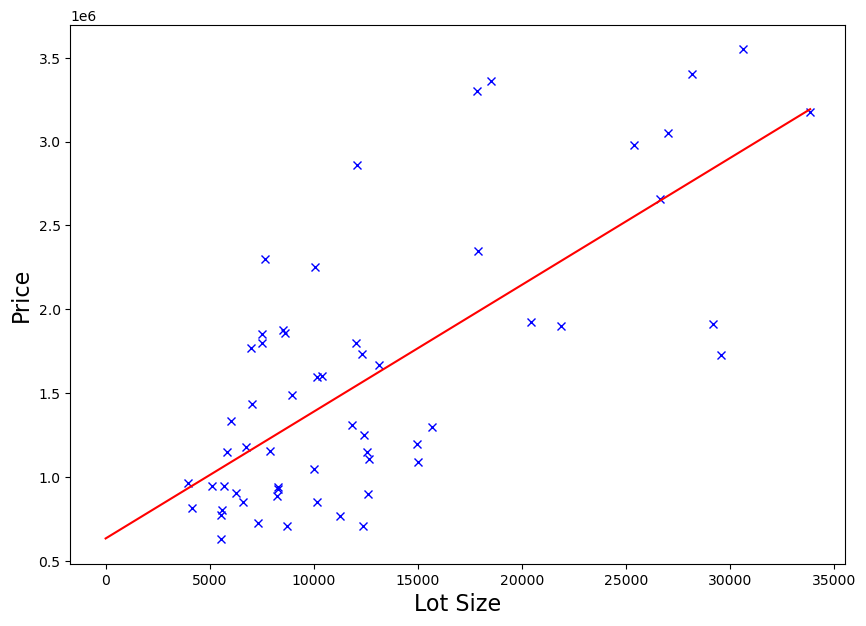

In [6]:
# Plotting data and regression line

%matplotlib inline
import matplotlib.pyplot as plt

xmax=np.max(X1)  # find the maximum of x
Xp = np.linspace(0,xmax).reshape(-1, 1)  #generate an array of evenly spaced points of x
Xplot = np.column_stack((np.ones_like(Xp),Xp))

Yplot = Xplot @ theta # calculate the regression line

fig, ax = plt.subplots()  # ax refers to the picture, fig refers to an invisible container around it
fig.set_size_inches(10, 7) 

ax.set_xlabel("Lot Size", fontsize=16)
ax.set_ylabel("Price", fontsize=16)

ax.plot(X1,Y,'x',color='Blue')  # scatter plot of data
plt.plot(Xp,Yplot, color='red') # regression line

plt.show()

### Question 7 (b) Write code to do regression of price on living area and give a plot like above.

In [7]:
X1 = Newton.LIVING_AREA.values.reshape(-1, 1) # Feature variable is LIVING_AREA
X = np.column_stack((np.ones_like(X1),X1)) # add a column of ones to the left of X1
Y = Newton.PRICE.values.reshape(-1, 1) # Output variable

theta, MSE = LinearReg(X,Y) # Perform Linear regression

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0])
print("Mean RSS = ", MSE)

Least square solution: theta_0= 62067.05530498321 , theta_1= 460.3667480783538
Mean RSS =  124776747373.62234


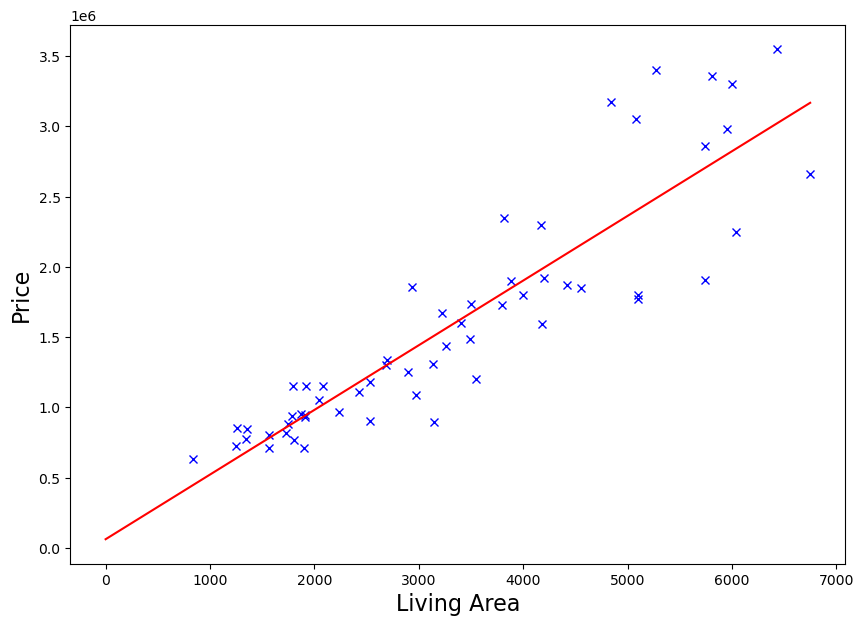

In [8]:
# Plotting data and regression line

%matplotlib inline
import matplotlib.pyplot as plt

xmax=np.max(X1)  # find the maximum of x
Xp = np.linspace(0,xmax).reshape(-1, 1)  #generate an array of evenly spaced points of x
Xplot = np.column_stack((np.ones_like(Xp),Xp))

Yplot = Xplot @ theta # calculate the regression line

fig, ax = plt.subplots()  # ax refers to the picture, fig refers to an invisible container around it
fig.set_size_inches(10, 7) 

ax.set_xlabel("Living Area", fontsize=16)
ax.set_ylabel("Price", fontsize=16)

ax.plot(X1,Y,'x',color='Blue')  # scatter plot of data
plt.plot(Xp,Yplot, color='red') # regression line

plt.show()

### Question 7 (c) Run the next two cells (before part b) to get regression of price on two feature variables: living area and lot size lot size. You will get a picture too.

In [9]:
X1=Newton.LIVING_AREA.values.reshape(-1, 1) # We use two feature variables LIVING_AREA and LOT_SIZE
X2=Newton.LOT_SIZE.values.reshape(-1, 1)
X = np.column_stack((np.ones_like(X1),X1,X2)) # put a column of ones and X1, X2 together
Y=Newton.PRICE.values.reshape(-1, 1)

theta, MSE = LinearReg(X,Y) # Perform Linear regression

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0], ", theta_2=", theta[2][0])
print("Mean RSS = ", MSE)

Least square solution: theta_0= 9662.053547745656 , theta_1= 383.41973203101327 , theta_2= 24.28582034984721
Mean RSS =  105204207833.34949


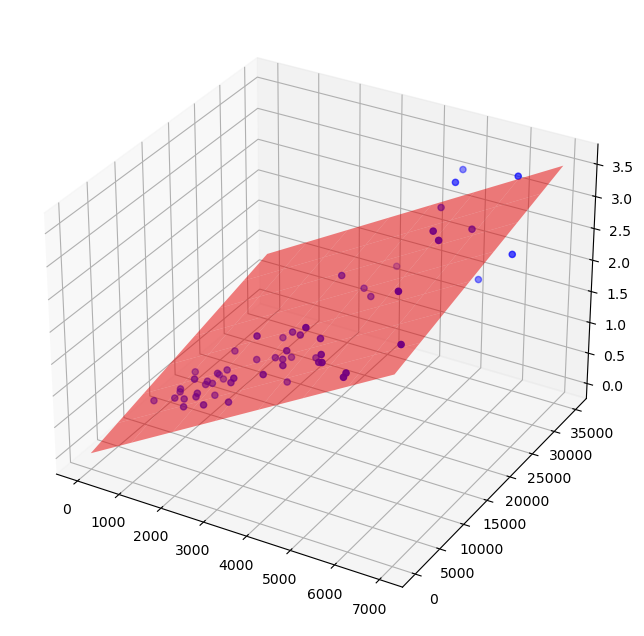

In [10]:
# calculate the regression plane 

xx, yy = np.meshgrid(range(0, 8000, 1000),range(0, 40000, 5000))
x = np.array([xx.flatten(),yy.flatten()])
dx = np.vstack([np.ones(xx.flatten().shape[0]),xx.flatten(), yy.flatten()])
y_p = np.matmul(dx.T,theta)

# plot the data and the regression plane 

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter3D(X1, X2, Y, zdir='z', s=20, color='Blue')
ax.plot_surface(xx, yy, y_p.reshape((8,8)), alpha=0.5,color='red')

plt.show()

### Question 7 (d) Write code to do regression of price on living area and bedrooms, and give a plot like above.

In [11]:
X1=Newton.LIVING_AREA.values.reshape(-1, 1) # We use two feature variables LIVING_AREA and BEDROOMS
X2=Newton.BEDROOMS.values.reshape(-1, 1)
X = np.column_stack((np.ones_like(X1),X1,X2)) # put a column of ones and X1, X2 together
Y=Newton.PRICE.values.reshape(-1, 1)

theta, MSE = LinearReg(X,Y) # Perform Linear regression

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0], ", theta_2=", theta[2][0])
print("Mean RSS = ", MSE)

Least square solution: theta_0= 14743.550080229497 , theta_1= 447.4222766037613 , theta_2= 21064.83253819663
Mean RSS =  124449800607.18555


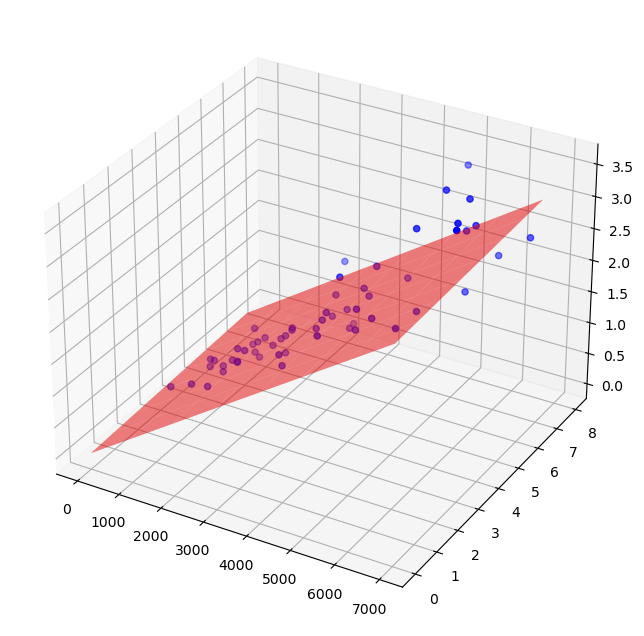

In [13]:
# calculate the regression plane 

xx, yy = np.meshgrid(range(0, 8000, 1000),range(0, 8, 1))
x = np.array([xx.flatten(),yy.flatten()])
dx = np.vstack([np.ones(xx.flatten().shape[0]),xx.flatten(), yy.flatten()])
y_p = np.matmul(dx.T,theta)

# plot the data and the regression plane 

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter3D(X1, X2, Y, zdir='z', s=20, color='Blue')
ax.plot_surface(xx, yy, y_p.reshape((8,8)), alpha=0.5,color='red')

plt.show()

### Question 7 (e)   Write code to do regression of price on living area, lot size, and bedrooms, calculate the mean RSS, and make a comment on the mean RSS compared to earlier errors. No need to plot (it's a picture in 4 dimensions!)

In [14]:
X1 = Newton.LIVING_AREA.values.reshape(-1, 1) # We use three feature variables LIVING_AREA, LOT_SIZE, BEDROOMS
X2 = Newton.LOT_SIZE.values.reshape(-1, 1)
X3 = Newton.BEDROOMS.values.reshape(-1,1)
X = np.column_stack((np.ones_like(X1),X1,X2,X3)) # put a column of ones and X1, X2, X3 together
Y = Newton.PRICE.values.reshape(-1, 1)

theta, MSE = LinearReg(X,Y) # Perform Linear regression

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0], ", theta_2=", theta[2][0],
      ", theta_2=", theta[3][0])
print("Mean RSS = ", MSE)

Least square solution: theta_0= -23033.65560528892 , theta_1= 374.69898831888975 , theta_2= 24.199493437392537 , theta_2= 14636.56572368513
Mean RSS =  105046607024.31784


The mean RSS (error) is lower with this model than with the previous models, indicating that it is useful to include more features while trying to predict the price label for this dataset. However, the error is only slightly lower relative to the previous error using living room and bedrooms, so including lot size did not change too much. 

### Question 7 (f)   Write code to do a quadratic regression of price on living area, calculate the mean RSS, and make a comment on the mean RSS compared to the error in part (b). To square a column X, you may do X**2. 
### Moreover, write code to plot the regression curve on top of the data points. You only need to make a smaill change to the plotting code in part (b). 

In [17]:
X1 = Newton.LIVING_AREA.values.reshape(-1, 1)
X = np.column_stack((np.ones_like(X1),X1,X1**2))
Y = Newton.PRICE.values.reshape(-1, 1)

theta, MSE = LinearReg(X,Y) # Perform Linear regression

print("Least square solution: theta_0=", theta[0][0], ", theta_1=", theta[1][0], ", theta_2=", theta[2][0])
print("Mean RSS = ", MSE)

Least square solution: theta_0= 266152.66157960286 , theta_1= 324.1151439430015 , theta_2= 0.018462041414113912
Mean RSS =  122961796654.07442


The mean RSS with this quadratic model is slightly lower than that of the previous linear models. This makes sense as the line being plotted is more complex. Since we have already seen that including more features is helpful for the models efficacy, the quadratic model may get better if we were to include extra features in it both as linear and as quadratic features.

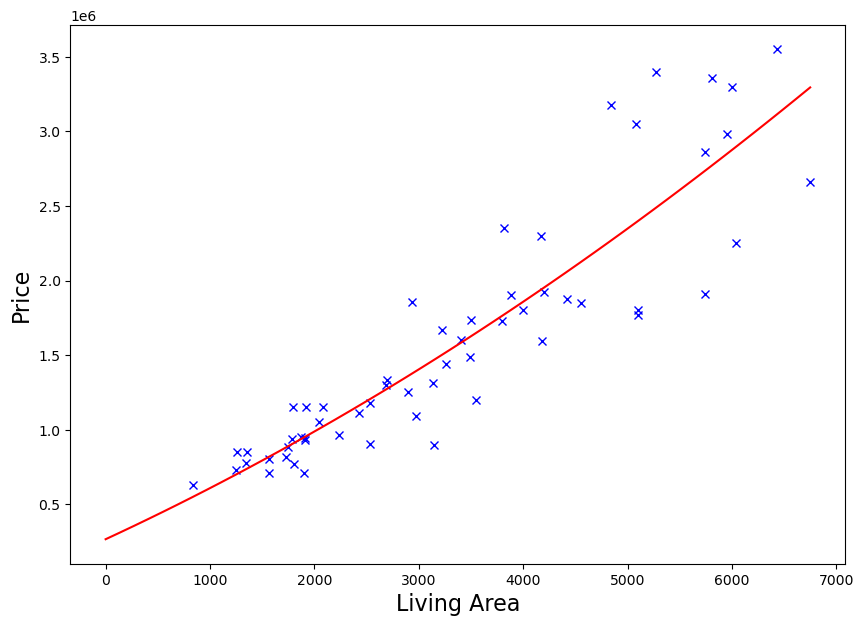

In [18]:
# Plotting data and regression line

%matplotlib inline
import matplotlib.pyplot as plt

xmax=np.max(X1)  # find the maximum of x
Xp = np.linspace(0,xmax).reshape(-1, 1)  #generate an array of evenly spaced points of x
Xplot = np.column_stack((np.ones_like(Xp),Xp, Xp**2))

Yplot = Xplot @ theta # calculate the regression line

fig, ax = plt.subplots()  # ax refers to the picture, fig refers to an invisible container around it
fig.set_size_inches(10, 7) 

ax.set_xlabel("Living Area", fontsize=16)
ax.set_ylabel("Price", fontsize=16)

ax.plot(X1,Y,'x',color='Blue')  # scatter plot of data
plt.plot(Xp,Yplot, color='red') # regression line

plt.show()